#Topic 1. Exploratory data analysis with Pandas

https://www.kaggle.com/neuromusic/avocado-prices

In [6]:
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)

In [7]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.shape

(18249, 13)

In [11]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [14]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,1.82e+04,1.82e+04,1.82e+04,1.82e+04,1.82e+04,1.82e+04,1.82e+04,18249.00,18249.00
mean,1.41,8.51e+05,2.93e+05,2.95e+05,2.28e+04,2.40e+05,1.82e+05,5.43e+04,3106.43,2016.15
std,0.40,3.45e+06,1.26e+06,1.20e+06,1.07e+05,9.86e+05,7.46e+05,2.44e+05,17692.89,0.94
min,0.44,8.46e+01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,2015.00
25%,1.10,1.08e+04,8.54e+02,3.01e+03,0.00e+00,5.09e+03,2.85e+03,1.27e+02,0.00,2015.00
50%,1.37,1.07e+05,8.65e+03,2.91e+04,1.85e+02,3.97e+04,2.64e+04,2.65e+03,0.00,2016.00
75%,1.66,4.33e+05,1.11e+05,1.50e+05,6.24e+03,1.11e+05,8.33e+04,2.20e+04,132.50,2017.00
max,3.25,6.25e+07,2.27e+07,2.05e+07,2.55e+06,1.94e+07,1.34e+07,5.72e+06,551693.65,2018.00


In [15]:
df.describe(include=["object", "int64"])

,Date,type,year,region
count,18249,18249,18249.00,18249
unique,169,2,NaN,54
top,2016-07-10,conventional,NaN,HartfordSpringfield
freq,108,9126,NaN,338
mean,NaN,NaN,2016.15,NaN
std,NaN,NaN,0.94,NaN
min,NaN,NaN,2015.00,NaN
25%,NaN,NaN,2015.00,NaN
50%,NaN,NaN,2016.00,NaN
75%,NaN,NaN,2017.00,NaN


In [17]:
df["year"].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [18]:
df["year"].value_counts(normalize=True)

2017    0.31
2016    0.31
2015    0.31
2018    0.07
Name: year, dtype: float64

In [19]:
df.sort_values(by="Total Volume", ascending=False).head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9097,2018-02-04,0.87,6.25e+07,2.16e+07,2.04e+07,1.07e+06,1.94e+07,1.34e+07,5.72e+06,269450.96,conventional,2018,TotalUS
8366,2017-02-05,0.77,6.10e+07,2.27e+07,2.03e+07,1.66e+06,1.63e+07,1.26e+07,3.62e+06,112869.96,conventional,2017,TotalUS
5506,2016-02-07,0.76,5.23e+07,1.66e+07,2.05e+07,2.55e+06,1.27e+07,9.08e+06,3.37e+06,241661.48,conventional,2016,TotalUS
8353,2017-05-07,1.09,4.73e+07,1.71e+07,1.35e+07,8.63e+05,1.58e+07,1.12e+07,4.32e+06,252415.49,conventional,2017,TotalUS
5493,2016-05-08,0.82,4.63e+07,1.42e+07,1.79e+07,1.99e+06,1.22e+07,8.75e+06,3.34e+06,120650.09,conventional,2016,TotalUS


In [22]:
df.sort_values(by=["Total Volume", "AveragePrice"], ascending=[True, False]).head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10381,2015-11-08,1.59,84.56,3.95,3.95,0.0,76.66,73.33,3.33,0.0,organic,2015,MiamiFtLauderdale
9437,2015-01-04,1.73,379.82,0.00,59.82,0.0,320.00,320.00,0.00,0.0,organic,2015,BuffaloRochester
13189,2016-10-30,1.58,385.55,8.13,47.42,0.0,330.00,330.00,0.00,0.0,organic,2016,MiamiFtLauderdale
11698,2015-07-12,2.05,419.98,0.00,63.42,0.0,356.56,356.56,0.00,0.0,organic,2015,Syracuse
13193,2016-10-02,1.49,472.82,10.50,18.99,0.0,443.33,440.00,3.33,0.0,organic,2016,MiamiFtLauderdale


In [23]:
df["Total Volume"].mean()

850644.0130089332

In [24]:
df[df["year"] == 2015].mean()

AveragePrice         1.38
Total Volume    781027.37
4046            304443.45
4225            313633.84
4770             25426.96
Total Bags      137523.11
Small Bags      113033.43
Large Bags       23520.29
XLarge Bags        969.39
year              2015.00
dtype: float64

In [25]:
df[df["year"] == 2016].mean()

AveragePrice         1.34
Total Volume    858420.56
4046            271567.47
4225            297850.48
4770             28468.63
Total Bags      260533.99
Small Bags      197025.33
Large Bags       59940.59
XLarge Bags       3568.07
year              2016.00
dtype: float64

In [29]:
df[(df["year"] == 2015) & (df["Total Volume"] <= 3.33e+04)].mean()

AveragePrice       1.70
Total Volume    7865.55
4046            2094.53
4225            3488.13
4770             117.27
Total Bags      2165.61
Small Bags      1472.46
Large Bags       693.15
XLarge Bags        0.00
year            2015.00
dtype: float64

In [32]:
df[(df["year"] == 2015) & (df["Total Volume"] <= 3.33e+04)]["Total Bags"].max()

21861.64

In [33]:
df.loc[5:10, "Date":"Total Volume"]

,Date,AveragePrice,Total Volume
5,2015-11-22,1.26,55979.78
6,2015-11-15,0.99,83453.76
7,2015-11-08,0.98,109428.33
8,2015-11-01,1.02,99811.42
9,2015-10-25,1.07,74338.76
10,2015-10-18,1.12,84843.44


In [34]:
df.iloc[0:5, 0:3]

,Date,AveragePrice,Total Volume
0,2015-12-27,1.33,64236.62
1,2015-12-20,1.35,54876.98
2,2015-12-13,0.93,118220.22
3,2015-12-06,1.08,78992.15
4,2015-11-29,1.28,51039.60


In [35]:
df[-1:]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [36]:
df.apply(np.max)

Date                  2018-03-25
AveragePrice                 3.2
Total Volume             6.3e+07
4046                     2.3e+07
4225                       2e+07
4770                     2.5e+06
Total Bags               1.9e+07
Small Bags               1.3e+07
Large Bags               5.7e+06
XLarge Bags              5.5e+05
type                     organic
year                        2018
region          WestTexNewMexico
dtype: object

In [42]:
regionW5 = df[df["region"].apply(lambda region: (region[0] == "W") & (len(region) <= 5))]
regionW = df[df["region"].apply(lambda region: region[0] == "W")]

print(regionW5.shape)
print(regionW.shape)
regionW5.head()

(338, 13)
(673, 13)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,2015-12-27,0.83,5.29e+06,2.04e+06,1.72e+06,125254.82,1.41e+06,8.38e+05,567269.76,5144.13,conventional,2015,West
2705,2015-12-20,0.88,4.74e+06,2.02e+06,1.31e+06,130849.60,1.27e+06,8.44e+05,417746.45,13319.61,conventional,2015,West
2706,2015-12-13,0.85,4.90e+06,1.80e+06,1.60e+06,134101.62,1.37e+06,8.52e+05,517936.19,570.88,conventional,2015,West
2707,2015-12-06,0.75,6.20e+06,2.10e+06,2.05e+06,107568.34,1.95e+06,1.36e+06,582846.33,2224.99,conventional,2015,West
2708,2015-11-29,0.99,3.72e+06,1.46e+06,1.22e+06,104219.76,9.37e+05,6.89e+05,247318.15,718.76,conventional,2015,West


In [43]:
df["type"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [44]:
d = {"conventional": "CoNvEnTiOnAl", "organic": "cool"}
df["type"] = df["type"].map(d)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,CoNvEnTiOnAl,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,CoNvEnTiOnAl,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,CoNvEnTiOnAl,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,CoNvEnTiOnAl,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,CoNvEnTiOnAl,2015,Albany


In [45]:
columns_to_show = ["4046", "Total Bags", "region"]

df.groupby(["AveragePrice"])[columns_to_show].describe(percentiles=[])

4046                       ... Total Bags                      
             count      mean        std  ...        min        50%        max
AveragePrice                             ...                                 
0.44           1.0  2.24e+02        NaN  ...   59084.32   59084.32   59084.32
0.46           1.0  1.20e+06        NaN  ...  450365.83  450365.83  450365.83
0.48           1.0  7.18e+02        NaN  ...   46034.32   46034.32   46034.32
0.49           2.0  3.69e+05  521888.65  ...   39298.56   70095.18  100891.80
0.51           5.0  6.24e+05  570825.13  ...   14863.31   97564.37  193803.25
...            ...       ...        ...  ...        ...        ...        ...
3.04           1.0  4.19e+02        NaN  ...    7240.27    7240.27    7240.27
3.05           1.0  1.04e+03        NaN  ...     947.07     947.07     947.07
3.12           1.0  5.90e+03        NaN  ...    3105.97    3105.97    3105.97
3.17           1.0  1.26e+03        NaN  ...    1680.70    1680.70    1680.70
3.25           1.0  2.33e+03        NaN  ...    3232.16    3232.16    3232.16

[259 rows x 12 columns]

In [46]:
columns_to_show = ["4046", "Total Bags", "region"]

df.groupby(["AveragePrice"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

4046                       ... Total Bags                      
                  mean        std      amin  ...        std       amin       amax
AveragePrice                                 ...                                 
0.44          2.24e+02        NaN  2.24e+02  ...        NaN   59084.32   59084.32
0.46          1.20e+06        NaN  1.20e+06  ...        NaN  450365.83  450365.83
0.48          7.18e+02        NaN  7.18e+02  ...        NaN   46034.32   46034.32
0.49          3.69e+05  521888.65  2.53e+02  ...   43553.00   39298.56  100891.80
0.51          6.24e+05  570825.13  2.25e+02  ...   72376.62   14863.31  193803.25
...                ...        ...       ...  ...        ...        ...        ...
3.04          4.19e+02        NaN  4.19e+02  ...        NaN    7240.27    7240.27
3.05          1.04e+03        NaN  1.04e+03  ...        NaN     947.07     947.07
3.12          5.90e+03        NaN  5.90e+03  ...        NaN    3105.97    3105.97
3.17          1.26e+03        NaN  1.26e+03  ...        NaN    1680.70    1680.70
3.25          2.33e+03        NaN  2.33e+03  ...        NaN    3232.16    3232.16

[259 rows x 8 columns]

In [48]:
pd.crosstab(df["AveragePrice"], df["type"])

type,CoNvEnTiOnAl,cool
AveragePrice,,
0.44,0,1
0.46,1,0
0.48,0,1
0.49,1,1
0.51,3,2
...,...,...
3.04,0,1
3.05,0,1
3.12,0,1


In [49]:
pd.crosstab(df["AveragePrice"], df["type"], normalize=True)

type,CoNvEnTiOnAl,cool
AveragePrice,,
0.44,0.00e+00,5.48e-05
0.46,5.48e-05,0.00e+00
0.48,0.00e+00,5.48e-05
0.49,5.48e-05,5.48e-05
0.51,1.64e-04,1.10e-04
...,...,...
3.04,0.00e+00,5.48e-05
3.05,0.00e+00,5.48e-05
3.12,0.00e+00,5.48e-05


In [50]:
df.pivot_table(
    ["Small Bags", "Large Bags", "XLarge Bags"],
    ["region"],
    aggfunc="mean",
)

,Large Bags,Small Bags,XLarge Bags
region,,,
Albany,1.15e+03,6.65e+03,128.49
Atlanta,3.21e+04,5.16e+04,822.79
BaltimoreWashington,2.90e+03,1.01e+05,612.38
Boise,2.10e+03,1.38e+04,30.92
Boston,4.44e+03,5.89e+04,251.12
BuffaloRochester,3.73e+03,3.04e+04,242.31
California,3.64e+04,6.78e+05,15599.34
Charlotte,2.91e+03,3.15e+04,205.93
Chicago,5.01e+03,4.38e+04,1120.93


In [ ]:
prs_xlarge_bags = (
    df["XLarge Bags"] / 
    (df["XLarge Bags"] 
     + df["Small Bags"] 
     + df["Large Bags"])
)

df.insert(loc=len(df.columns), column="XLarge from total", value=prs_xlarge_bags)

In [54]:
df["XLarge from total"].max()

0.6447668185275377

In [55]:
df.drop(["4046", "4770"], axis=1, inplace=True)

df.drop([1, 2]).head()

,Date,AveragePrice,Total Volume,4225,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,XLarge from total
0,2015-12-27,1.33,64236.62,54454.85,8696.87,8603.62,93.25,0.0,CoNvEnTiOnAl,2015,Albany,0.0
3,2015-12-06,1.08,78992.15,71976.41,5811.16,5677.40,133.76,0.0,CoNvEnTiOnAl,2015,Albany,0.0
4,2015-11-29,1.28,51039.60,43838.39,6183.95,5986.26,197.69,0.0,CoNvEnTiOnAl,2015,Albany,0.0
5,2015-11-22,1.26,55979.78,48067.99,6683.91,6556.47,127.44,0.0,CoNvEnTiOnAl,2015,Albany,0.0
6,2015-11-15,0.99,83453.76,73672.72,8318.86,8196.81,122.05,0.0,CoNvEnTiOnAl,2015,Albany,0.0


In [58]:
pd.crosstab(df["AveragePrice"], df["type"], margins=True)

type,CoNvEnTiOnAl,cool,All
AveragePrice,,,
0.44,0,1,1
0.46,1,0,1
0.48,0,1,1
0.49,1,1,2
0.51,3,2,5
...,...,...,...
3.05,0,1,1
3.12,0,1,1
3.17,0,1,1


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

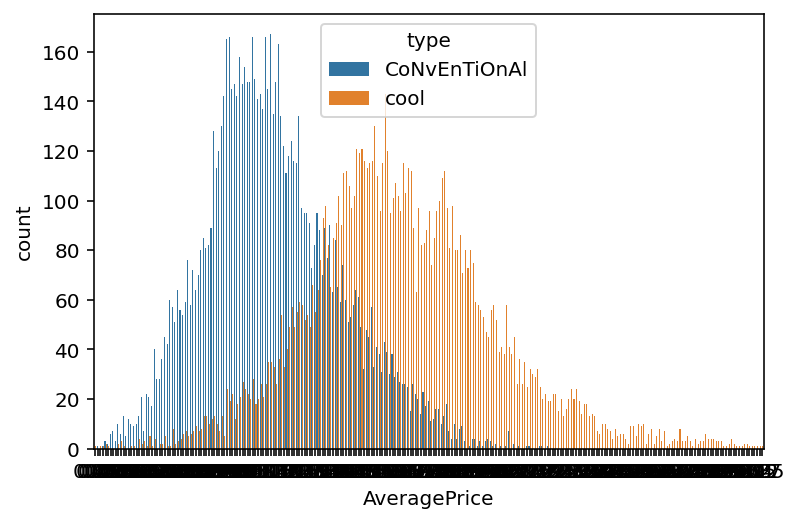

In [62]:
sns.countplot(x="AveragePrice", hue="type", data=df);

In [67]:
pd.crosstab(df["AveragePrice"], df["region"], margins=True)

region,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,Columbus,DallasFtWorth,Denver,Detroit,GrandRapids,GreatLakes,HarrisburgScranton,HartfordSpringfield,Houston,Indianapolis,Jacksonville,LasVegas,LosAngeles,Louisville,MiamiFtLauderdale,Midsouth,Nashville,NewOrleansMobile,NewYork,Northeast,NorthernNewEngland,Orlando,Philadelphia,PhoenixTucson,Pittsburgh,Plains,Portland,RaleighGreensboro,RichmondNorfolk,Roanoke,Sacramento,SanDiego,SanFrancisco,Seattle,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico,All
AveragePrice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0.46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0.48,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0.49,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
0.51,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3.12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


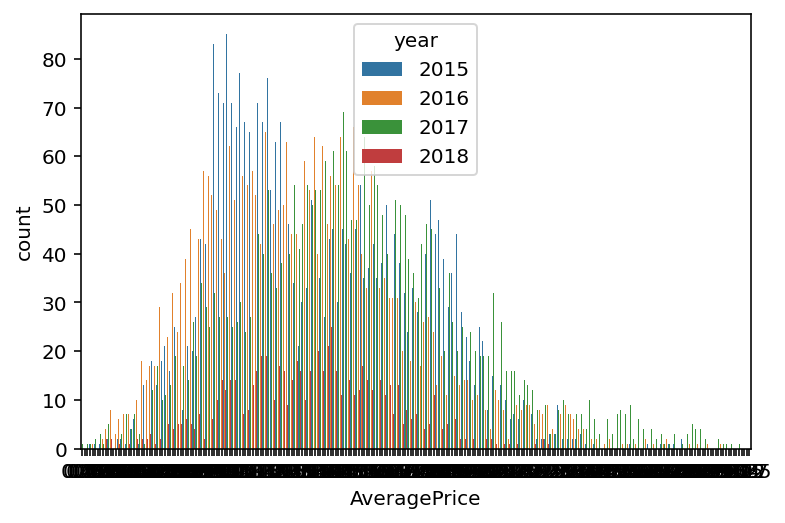

In [71]:
sns.countplot(x="AveragePrice", hue="year", data=df)